# Project
Explatory data analysis and machine learning model of [Car Evaluation Dataset from UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

# Dataset

### Number of Instances
1728 (instances completely cover the attribute space)


### Attribute Values
|Attribute|Value|Description|
|---|---|---|
|buying|v-high, high, med, low|Buying price|
|maint|v-high, high, med, low|Price of the maintenance|
|doors|2, 3, 4, 5-more|Number of doors|
|persons|2, 4, more|Capacity in terms of persons to carry|
|lug_boot|small, med, big|The size of luggage boot|
|safety|low, med, high|Estimated safety of the car|
   
### Class Distribution (number of instances per class)

|class|N|N[%]|
|---|---|---|
|unacc|1210|(70.023 %)|
|acc|384|(22.222 %)|
|good|69|( 3.993 %)|
|v-good|65|( 3.762 %)|


# Importing Libraries

In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import pyplot

import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [848]:
df = pd.read_csv("dataset/car.data", header=None)
df_with_columns = df
df_with_columns.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

df_with_columns.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Transform columns into numbers 

In [849]:
# Transform
label_encoder = preprocessing.LabelEncoder()

def transform_column(name):
    df_with_columns[name] = label_encoder.fit_transform(df_with_columns[name])
    
transform_column("buying")
transform_column("maint")
transform_column("lug_boot")
transform_column("safety")

transform_column("class")

# Reaplace "more" values to numbers
df_with_columns["doors"] = df_with_columns["doors"].replace("5more", 5)
df_with_columns["persons"] = df_with_columns["persons"].replace("more", 5)

df_with_columns.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


## Understanding correlations between the attributes

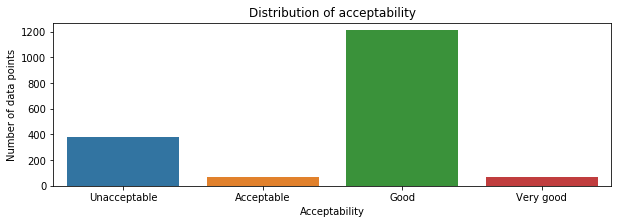

In [850]:
plt.rcParams['figure.figsize'] = [10, 3]

df_plot = df_with_columns

classes = [0, 1, 2, 3]

sns.countplot(data=df_plot, x = 'class')

plt.title('Distribution of acceptability')
plt.xlabel('Acceptability')
plt.ylabel("Number of data points")

plt.xticks(classes, ('Unacceptable', 'Acceptable', 'Good', 'Very good'))
plt.show()

# Choosing the estimator

## Naive-Bayes

In [851]:
X = df_with_columns.drop(columns=["class"])
y = df_with_columns.drop(columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.7023121387283237

## SVM

In [852]:
clf = SVC()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.9046242774566474

## Decision-Tree

In [853]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy_score(y_test, predictions)

0.9739884393063584

## Hyperparameter tuning

In [854]:
# Params to tune and the range values
max_depths = range(1, 15, 2)
min_samples_leaf = range(1, 8, 2)
min_samples_split = range(2, 8, 2)

param_grid = {
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split
}
# or you can use: param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

In [855]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)

clf = GridSearchCV(dt, param_grid, cv=5, return_train_score=False)

clf.fit(X_train, y_train)

pd.DataFrame(clf.cv_results_)[['param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,1,2,0.973227
1,1,4,0.965268
2,1,6,0.955861
3,3,2,0.956585
4,3,4,0.956585
5,3,6,0.956585
6,5,2,0.949349
7,5,4,0.949349
8,5,6,0.949349
9,7,2,0.937048


In [856]:
clf.best_score_

0.9732272069464544

In [857]:
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [858]:
rs = RandomizedSearchCV(dt, 
                        param_grid, 
                        cv=5, 
                        return_train_score=False, 
                        n_iter=5)
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]

,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,3,2,0.956585
1,1,6,0.955861
2,1,2,0.973227
3,3,4,0.956585
4,7,4,0.937048


In [859]:
rs.best_score_

0.9732272069464544

In [860]:
## Parameters has been determined

clf = DecisionTreeClassifier(max_depth=None, random_state=42, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9739884393063584

In [861]:
# Testing
actual = [[1, 1, 5, 2, 1, 0]]

clf.predict(actual)

array([2])

### How about different models with different hyperparameters?

In [862]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

model_params = {
    'decision-tree': {
        'model': DecisionTreeClassifier(random_state=42, max_depth=None),
        'params' : {
            'min_samples_leaf':range(1, 8, 2),
            'min_samples_split':range(2, 8, 1)
        }  
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
}

In [863]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.987699,"{u'kernel': u'rbf', u'C': 20}"
1,naive_bayes_gaussian,0.693922,{}
2,decision-tree,0.973227,"{u'min_samples_split': 2, u'min_samples_leaf': 1}"
3,logistic_regression,0.703329,{u'C': 1}
4,random_forest,0.936324,{u'n_estimators': 5}
5,naive_bayes_multinomial,0.705499,{}


## SVM has been chosen

In [868]:
clf = svm.SVC(gamma='auto', kernel='rbf', C=20)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy_score(y_test, pred)

0.9855491329479769

In [869]:
# Testing
actual = [[1, 1, 5, 2, 1, 0]]

clf.predict(actual)

array([2])

In [866]:
X = X.values
X = X.astype(int)
X = X[:, [5, 2]]
y = y.values
y = y.astype(int)
y = y[:, 0]

clf = DecisionTreeClassifier(splitter='best')
clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(sharex='col', sharey='row', figsize=(10, 4))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[:, 0], X[:, 1], s=20, c=y)
axarr.set_title('Decision Tree')
    
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'